---
Eksplorasi Data: Memahami Data dengan Statistik - Part 1
---

Selanjutnya saya akan menjelaskan secara singkat tentang tahapan-tahapan dalam pembuatan model machine learning. Membuat model machine learning tidak serta-merta langsung modelling, ada tahapan sebelumnya yang penting untuk dilakukan sehingga kita menghasilkan model yang baik. Untuk penjelasan ini, kalian akan mempraktekkan langsung ya. Kita akan memanfaatkan Pandas library. Pandas cukup powerful untuk digunakan dalam menganalisa, memanipulasi dan membersihkan data.

Oke, Pertama- tama,  kita check dimensi data kita terlebih dahulu. Aksara, silahkan load datanya dan gunakan .shape, .head(), .info(), dan .describe() untuk mengeksplorasi dataset secara berurut. Dataset ini adalah data pembeli online yang mengunjungi website dari suatu e-commerce selama setahun, yaitu 'https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv'.

---

In [3]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

---
Eksplorasi Data: Memahami Data dengan Statistik - Part 2
---
Data eksplorasi tidaklah cukup dengan mengetahui dimensi data dan statistical properties saja, tetapi kita juga perlu sedikit menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity). Jadi, jika kita sudah tahu bahwa data kita berkorelasi kuat, kita bisa menggunakan algorithm lain yang tidak sensitif terhadap hubungan korelasi dari feature/variabel seperti decision tree.

---

In [ ]:
dataset_corr = dataset.corr()
print('korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType', 'Weekend'])

---

mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan,

---

---
Eksplorasi Data: Memahami Data dengan Visual
---
Begini, selain dengan statistik, kita juga bisa melakukan eksplorasi data dalam bentuk visual. Dengan visualisasi kita dapat dengan mudah dan cepat dalam memahami data, bahkan dapat memberikan pemahaman yang lebih baik terkait hubungan setiap variabel/ features.

Misalnya kita ingin melihat distribusi label dalam bentuk visual, dan jumlah pembelian saat weekend. Kita dapat memanfaatkan matplotlib library untuk membuat chart yang menampilkan perbandingan jumlah yang membeli (1) dan tidak membeli (0), serta perbandingan jumlah pembelian saat weekend

---

c:\users\yala\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\yala\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


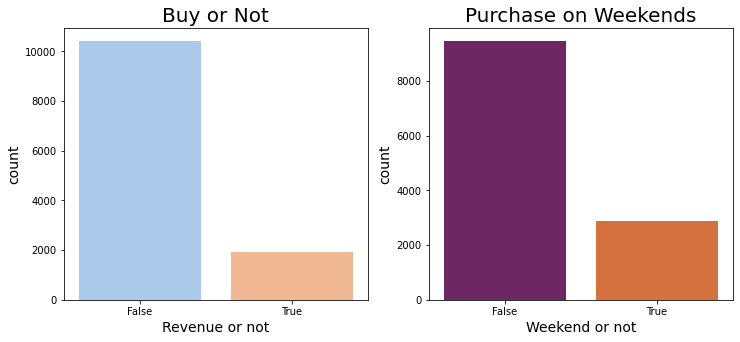

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend

plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()